# Config

In [2]:
CFG = {
    'CUDA_VISIBLE_DEVICES':'0',
    'seed':123,
    
    'test_size':0.3,
    
    'model_1': {
        'num_features':28*28,
        'num_hidden':50,
        'num_classes':10,
        'num_epochs':200, 
        'learning_rate':0.1,
        'minibatch_size':100
    },
    
    'model_2': {
        'num_features':28*28,
        'num_hidden':50,
        'num_hidden_2':50,                     
        'num_classes':10,
        'num_epochs':200, 
        'learning_rate':0.1,
        'minibatch_size':100
    },
    'model_3': {
        'input_dim':28*28,
        'hidden_dim':50,
        'output_dim':10,
        'batch_size': 100,
        'criterion': 'torch.nn.CrossEntropyLoss',
        'optimizer': {'name':'torch.optim.SGD', 'params': {'lr':0.1}},
    }
}

# Import Libraries

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]=CFG['CUDA_VISIBLE_DEVICES']
import utils
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
np.random.seed(CFG['seed'])
from sklearn.datasets import fetch_openml
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from matplotlib import pyplot as plt
import torch
import multiprocessing
import model_1_hidden_layer
import model_2_hidden_layers
import model_3_pytorch_ann
import pandas as pd

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Loading Data

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values
X = ((X / 255.) - .5) * 2
y = y.astype(int).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=CFG['test_size'], random_state=CFG['seed'], stratify=y)

# Model 1 - Single Hidden Layer (Numpy)

In [5]:
model = model_1_hidden_layer.NeuralNetMLP(
    num_features=CFG['model_1']['num_features'],
    num_hidden=CFG['model_1']['num_hidden'],
    num_classes=CFG['model_1']['num_classes']
)

In [6]:
epoch_loss, epoch_loss_valid, epoch_train_acc, epoch_valid_acc = model.train(
    X_train, y_train, X_test, y_test, 
    num_epochs=CFG['model_1']['num_epochs'], 
    learning_rate=CFG['model_1']['learning_rate']
)

Epoch: 001/200 | Train MSE: 0.05 | Train Acc: 74.70% | Valid Acc: 74.41%
Epoch: 002/200 | Train MSE: 0.03 | Train Acc: 84.20% | Valid Acc: 84.24%
Epoch: 003/200 | Train MSE: 0.03 | Train Acc: 87.56% | Valid Acc: 87.49%
Epoch: 004/200 | Train MSE: 0.02 | Train Acc: 88.69% | Valid Acc: 88.68%
Epoch: 005/200 | Train MSE: 0.02 | Train Acc: 89.84% | Valid Acc: 89.67%
Epoch: 006/200 | Train MSE: 0.02 | Train Acc: 90.40% | Valid Acc: 90.25%
Epoch: 007/200 | Train MSE: 0.02 | Train Acc: 90.84% | Valid Acc: 90.65%
Epoch: 008/200 | Train MSE: 0.02 | Train Acc: 91.17% | Valid Acc: 91.03%
Epoch: 009/200 | Train MSE: 0.02 | Train Acc: 91.42% | Valid Acc: 91.29%
Epoch: 010/200 | Train MSE: 0.01 | Train Acc: 91.65% | Valid Acc: 91.45%
Epoch: 011/200 | Train MSE: 0.01 | Train Acc: 91.97% | Valid Acc: 91.84%
Epoch: 012/200 | Train MSE: 0.01 | Train Acc: 92.18% | Valid Acc: 91.85%
Epoch: 013/200 | Train MSE: 0.01 | Train Acc: 92.38% | Valid Acc: 92.05%
Epoch: 014/200 | Train MSE: 0.01 | Train Acc: 92.60

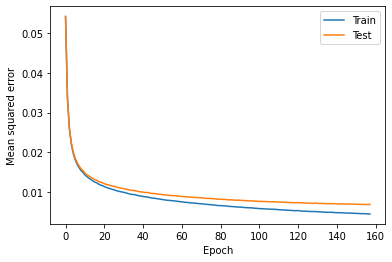

In [7]:
plt.plot(range(len(epoch_loss)), epoch_loss, label='Train')
plt.plot(range(len(epoch_loss_valid)), epoch_loss_valid, label='Test')
plt.ylabel('Mean squared error')
plt.xlabel('Epoch')
plt.legend()
os.makedirs('results/model_1/', exist_ok=True)
plt.savefig('results/model_1/mse.png')
plt.show()

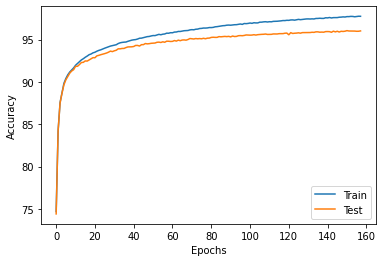

In [8]:
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,label='Train')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
os.makedirs('results/model_1/', exist_ok=True)
plt.savefig('results/model_1/accuracy.png')
plt.show()

In [9]:
mse, acc, proba, targets = utils.compute_mse_and_acc(model, X_test, y_test, return_proba=True)
print(f'Test accuracy: {acc*100:.2f}%')

Test accuracy: 96.02%


In [10]:
df_1 = pd.DataFrame(proba, columns = [f'proba_{p}' for p in range(10)])
df_1['pred'] = np.array(proba).argmax(1)
df_1['gt'] = np.array(targets)
df_1.to_csv('results/model_1/results.csv', index=False)

In [11]:
display(confusion_matrix(targets, np.argmax(proba, 1)))
print(accuracy_score(targets, np.argmax(proba, 1)))

array([[2035,    0,    2,    3,    1,    7,   11,    3,    7,    2],
       [   0, 2318,    4,    9,    5,    6,    2,    5,    7,    7],
       [  16,    9, 1997,    5,   22,    7,    8,   17,   16,    0],
       [   7,    4,   25, 2013,    0,   39,    4,   13,   28,    9],
       [   2,    4,    4,    2, 1974,    0,   15,    5,    7,   34],
       [   6,    4,    8,   24,    5, 1802,   17,    3,   15,   10],
       [   8,    3,    4,    1,    3,   21, 2017,    1,    5,    0],
       [   5,   12,   23,    5,   11,    1,    2, 2100,    4,   25],
       [   5,    9,   14,   13,   13,   17,   13,    7, 1947,   10],
       [  13,    5,    4,   16,   36,   11,    1,   25,   14, 1962]])

0.9602380952380952


In [12]:
auc = roc_auc_score(utils.int_to_onehot(np.array(targets), 10), utils.sigmoid(np.array(proba)), average='macro', multi_class='ovo')
print(f'Test AUC: {auc}')

Test AUC: 0.995835114250597


# Model 2 - Two Hidden Layers (Numpy)

In [14]:
model = model_2_hidden_layers.NeuralNetMLP_2(
    CFG['model_2']['num_features'],
    CFG['model_2']['num_hidden'],
    CFG['model_2']['num_hidden_2'],
    CFG['model_2']['num_classes']
)

In [15]:
epoch_loss, epoch_test_loss, epoch_train_acc, epoch_test_acc = model.train(X_train, y_train, X_test, y_test, num_epochs=200, learning_rate=0.1)

Epoch: 001/200 | Train MSE: 0.09 | Train Acc: 18.37% | Valid Acc: 18.57%
Epoch: 002/200 | Train MSE: 0.09 | Train Acc: 28.41% | Valid Acc: 28.35%
Epoch: 003/200 | Train MSE: 0.08 | Train Acc: 38.18% | Valid Acc: 37.75%
Epoch: 004/200 | Train MSE: 0.06 | Train Acc: 61.01% | Valid Acc: 60.93%
Epoch: 005/200 | Train MSE: 0.05 | Train Acc: 67.66% | Valid Acc: 67.60%
Epoch: 006/200 | Train MSE: 0.04 | Train Acc: 77.39% | Valid Acc: 77.14%
Epoch: 007/200 | Train MSE: 0.03 | Train Acc: 84.78% | Valid Acc: 84.32%
Epoch: 008/200 | Train MSE: 0.03 | Train Acc: 86.34% | Valid Acc: 86.04%
Epoch: 009/200 | Train MSE: 0.02 | Train Acc: 87.77% | Valid Acc: 87.47%
Epoch: 010/200 | Train MSE: 0.02 | Train Acc: 88.51% | Valid Acc: 88.39%
Epoch: 011/200 | Train MSE: 0.02 | Train Acc: 89.16% | Valid Acc: 89.02%
Epoch: 012/200 | Train MSE: 0.02 | Train Acc: 89.83% | Valid Acc: 89.53%
Epoch: 013/200 | Train MSE: 0.02 | Train Acc: 90.19% | Valid Acc: 89.83%
Epoch: 014/200 | Train MSE: 0.02 | Train Acc: 90.54

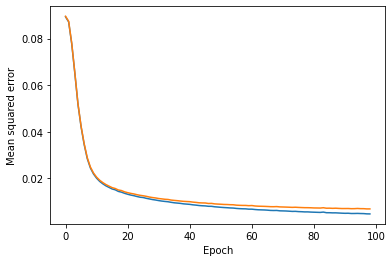

In [16]:
plt.plot(range(len(epoch_loss)), epoch_loss)
plt.plot(range(len(epoch_test_loss)), epoch_test_loss)
plt.ylabel('Mean squared error')
plt.xlabel('Epoch')
os.makedirs('results/model_2/', exist_ok=True)
plt.savefig('results/model_2/mse.png')
plt.show()

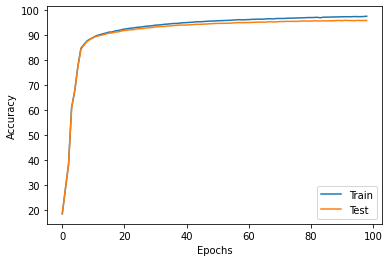

In [17]:
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,label='Train')
plt.plot(range(len(epoch_test_acc)), epoch_test_acc,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
os.makedirs('results/model_2/', exist_ok=True)
plt.savefig('results/model_2/accuracy.png')
plt.show()

In [18]:
mse, acc, preds, targets = utils.compute_mse_and_acc(model, X_test, y_test)
print(f'test MSE: {mse:.5f}')
print(f'test accuracy: {acc*100:.3f}%')

test MSE: 0.00685
test accuracy: 95.919%


In [19]:
display(confusion_matrix(targets, preds))
print(accuracy_score(targets, preds))

array([[2038,    0,    3,    1,    2,    9,   10,    2,    3,    3],
       [   0, 2329,    6,    6,    3,    7,    0,    3,    4,    5],
       [  15,    6, 2005,   12,   18,    1,    8,   14,   18,    0],
       [   2,    1,   23, 2034,    0,   33,    6,   10,   25,    8],
       [   3,    6,    4,    1, 1950,    0,   18,    5,    6,   54],
       [   6,   13,    2,   28,   10, 1791,   16,    4,   15,    9],
       [  15,    5,    2,    0,    7,   23, 2003,    1,    7,    0],
       [   6,   14,   22,   11,   16,    3,    1, 2078,    6,   31],
       [  10,   10,    8,   19,   10,   20,   11,    2, 1950,    8],
       [  13,    5,    0,   21,   34,   12,    1,   22,   14, 1965]])

0.9591904761904761


In [20]:
mse, acc, proba, targets = utils.compute_mse_and_acc(model, X_test, y_test, return_proba=True)

df_2 = pd.DataFrame(proba, columns = [f'proba_{p}' for p in range(10)])
df_2['pred'] = np.array(proba).argmax(1)
df_2['gt'] = np.array(targets)
df_2.to_csv('results/model_2/results.csv', index=False)

In [21]:
roc_auc_score(utils.int_to_onehot(np.array(targets), 10), utils.sigmoid(np.array(proba)), average='macro', multi_class='ovo')

0.9961484389845406

# Model 3 - Single Hidden Layer (Pytorch)

In [23]:
dataloader_train = torch.utils.data.DataLoader(model_3_pytorch_ann.MNIST784Dataset(X_train, y_train), batch_size=CFG['model_3']['batch_size'], shuffle=True, num_workers=multiprocessing.cpu_count()-1, pin_memory=False)
dataloader_test = torch.utils.data.DataLoader(model_3_pytorch_ann.MNIST784Dataset(X_test, y_test), batch_size=CFG['model_3']['batch_size'], shuffle=False, num_workers=multiprocessing.cpu_count()-1, pin_memory=False)

In [24]:

model = model_3_pytorch_ann.Net(input_dim=CFG['model_3']['input_dim'], hidden_dim=CFG['model_3']['hidden_dim'], output_dim=CFG['model_3']['output_dim'])

criterion = eval(CFG['model_3']['criterion'])()

learning_rate = 0.01
optimizer = eval(CFG['model_3']['optimizer']['name'])(model.parameters(), **CFG['model_3']['optimizer']['params'])
model = model.to('cuda')  
print(model)



Net(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=50, out_features=50, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=50, out_features=10, bias=True)
  )
)


In [25]:
train_history = model_3_pytorch_ann.train(model, criterion, optimizer, dataloader_train, dataloader_test)

Epoch: 000/200 | Test loss: 2.07 | Test loss: 1.48| Train acc: 0.322 | Test acc: 0.561
Epoch: 001/200 | Test loss: 1.01 | Test loss: 0.72| Train acc: 0.728 | Test acc: 0.817
Epoch: 002/200 | Test loss: 0.58 | Test loss: 0.50| Train acc: 0.850 | Test acc: 0.867
Epoch: 003/200 | Test loss: 0.43 | Test loss: 0.40| Train acc: 0.882 | Test acc: 0.892
Epoch: 004/200 | Test loss: 0.36 | Test loss: 0.35| Train acc: 0.900 | Test acc: 0.904
Epoch: 005/200 | Test loss: 0.32 | Test loss: 0.31| Train acc: 0.912 | Test acc: 0.912
Epoch: 006/200 | Test loss: 0.28 | Test loss: 0.29| Train acc: 0.920 | Test acc: 0.917
Epoch: 007/200 | Test loss: 0.26 | Test loss: 0.26| Train acc: 0.927 | Test acc: 0.927
Epoch: 008/200 | Test loss: 0.24 | Test loss: 0.24| Train acc: 0.933 | Test acc: 0.931
Epoch: 009/200 | Test loss: 0.22 | Test loss: 0.23| Train acc: 0.939 | Test acc: 0.934
Epoch: 010/200 | Test loss: 0.21 | Test loss: 0.22| Train acc: 0.943 | Test acc: 0.938
Epoch: 011/200 | Test loss: 0.19 | Test los

In [26]:
lst_gt = []
lst_pred = []
probas = []
for images, label_idxs in dataloader_test:
    with torch.no_grad():
        gt = list(label_idxs)
        output = list(model(images.float().to('cuda')).cpu().numpy().argmax(1))
        _probas = list(model(images.float().to('cuda')).cpu().numpy())
        
    lst_gt.extend(gt)
    lst_pred.extend(output)
    probas.extend(_probas)

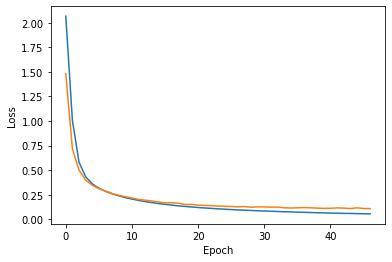

In [27]:
plt.plot(range(len(train_history['train_loss'])), train_history['train_loss'], label='Train')
plt.plot(range(len(train_history['test_loss'])), train_history['test_loss'], label='Test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
os.makedirs('results/model_3/', exist_ok=True)
plt.savefig('results/model_3/mse.png')
plt.show()

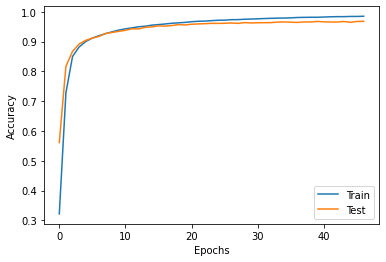

In [28]:
plt.plot(range(len(train_history['train_acc'])), train_history['train_acc'], label='Train')
plt.plot(range(len(train_history['test_acc'])), train_history['test_acc'], label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
os.makedirs('results/model_3/', exist_ok=True)
plt.savefig('results/model_3/accuracy.png')
plt.show()

In [29]:
df_3 = pd.DataFrame(probas, columns = [f'proba_{p}' for p in range(10)])
df_3['pred'] = np.array(probas).argmax(1)
df_3['gt'] = np.array(lst_gt)
df_3.to_csv('results/model_3/results.csv', index=False)

In [30]:
display(confusion_matrix(lst_gt, lst_pred))
print(accuracy_score(lst_gt, lst_pred))

mse = utils.mse_loss(y_test, probas)

predicted_labels = np.argmax(probas, axis=1)
acc = utils.accuracy(y_test, predicted_labels)

print(f'test MSE: {mse:.1f}')
print(f'test accuracy: {acc*100:.1f}%')

print('auc', roc_auc_score(utils.int_to_onehot(np.array(y_test), 10), utils.sigmoid(np.array(probas)), average='macro', multi_class='ovo'))

array([[2048,    0,    4,    0,    0,    3,   10,    1,    1,    4],
       [   0, 2332,    8,    2,    5,    2,    0,    7,    4,    3],
       [   8,    8, 2045,    8,    4,    1,    2,   13,    8,    0],
       [   3,    2,   24, 2060,    0,   24,    1,   10,   14,    4],
       [   1,    4,    5,    2, 1970,    1,   16,    7,    5,   36],
       [  13,    4,    3,   20,    3, 1819,   11,    2,   14,    5],
       [   7,   10,    4,    0,    5,   23, 2010,    0,    4,    0],
       [   3,    9,   26,    9,    9,    1,    1, 2107,    3,   20],
       [   8,    9,   18,   23,    5,   20,    7,    3, 1946,    9],
       [   7,    3,    0,   20,   18,    8,    1,   26,    9, 1995]])

0.9681904761904762
test MSE: 21.1
test accuracy: 96.8%
auc 0.9961782170900835


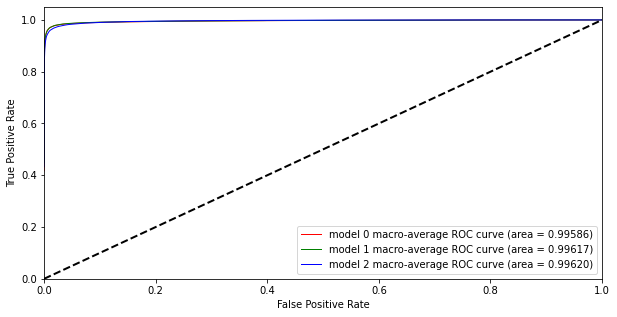

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score


df_1 = pd.read_csv('results/model_1/results.csv')
df_2 = pd.read_csv('results/model_2/results.csv')
df_3 = pd.read_csv('results/model_3/results.csv')

plt.figure(figsize=(10,5))
colors = ['r', 'g', 'b']
for idx, _df in enumerate([df_1, df_2, df_3]):
    y_test = pd.get_dummies(_df['gt'], prefix='gt').to_numpy()
    y_score = _df[[f'proba_{l}' for l in range(10)]].to_numpy()

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f'model {idx} ' + "macro-average ROC curve (area = {0:0.5f})".format(roc_auc["macro"]),
        color=colors[idx],
        linewidth=1,
    )



plt.plot([0, 1], [0, 1], "k--", lw=lw)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()